In [1]:
pip install kaggle

In [0]:
from google.colab import files

In [45]:
uploaded = files.upload()

In [27]:

!kaggle datasets download -d drscarlat/melanoma

100% 5.24G/5.26G [01:14<00:00, 82.1MB/s]
100% 5.26G/5.26G [01:14<00:00, 75.5MB/s]


In [26]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

User uploaded file "kaggle.json" with length 65 bytes
kaggle.json


In [28]:
os.listdir()

['.config', 'melanoma.zip', 'kaggle (1).json', 'kaggle.json', 'sample_data']

In [31]:
!unzip melanoma.zip

Archive:  melanoma.zip
  inflating: DermMel/test/Melanoma/AUG_0_1001.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1002.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1006.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1008.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1016.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1020.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1022.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1023.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1026.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1027.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1031.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1033.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1035.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1040.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1044.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1045.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1047.jpeg  
  inflating: DermMel/test/Melanoma/AUG_0_1064.jpeg  
  inflating: DermMel/te

In [0]:
os.listdir('dermmel/DermMel/valid/Melanoma')

In [0]:
import cv2

In [0]:
img = cv2.imread('dermmel/DermMel/valid/Melanoma/AUGmented_0_8513.jpeg')[:,:,::-1]

In [0]:
import matplotlib.pyplot as plty

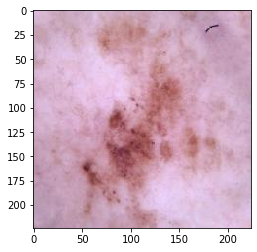

In [91]:
plty.imshow(img)

Training the Melanoma and  Non-Melanoma

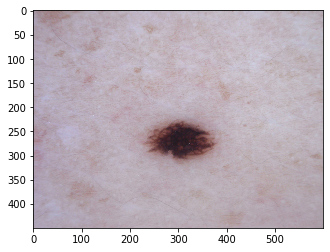

In [89]:

img = cv2.imread('dermmel/DermMel/valid/NotMelanoma/ISIC_0034308.jpg')[:,:,::-1]
plty.imshow(img)

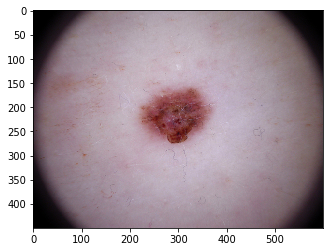

In [94]:

img = cv2.imread('dermmel/DermMel/valid/NotMelanoma/ISIC_0034088.jpg')[:,:,::-1]
plty.imshow(img)

In [0]:
import keras
from keras.applications import resnet50
from keras.layers import Dense
from keras.models import Model
from keras import Input
from keras.models import Sequential
from keras import layers

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
length = 100

In [0]:
train_melanoma = os.listdir("dermmel/DermMel/train_sep/Melanoma/")[:100]
train_non_melanoma = os.listdir("dermmel/DermMel/train_sep/NotMelanoma")[:100]

In [0]:
train_images = train_melanoma+train_non_melanoma

In [74]:
images = []
for index,i in enumerate(train_images):
  print("processing images# {}".format(index))
  if index<=99:
    img = cv2.imread('dermmel/DermMel/train_sep/Melanoma/'+i)
    imgx = cv2.resize(img,(300,300))
    images.append(imgx)
  elif index>99:
    img = cv2.imread('dermmel/DermMel/train_sep/NotMelanoma/'+i)
    imgx = cv2.resize(img,(300,300))
    images.append(imgx)
  

processing images# 0
processing images# 1
processing images# 2
processing images# 3
processing images# 4
processing images# 5
processing images# 6
processing images# 7
processing images# 8
processing images# 9
processing images# 10
processing images# 11
processing images# 12
processing images# 13
processing images# 14
processing images# 15
processing images# 16
processing images# 17
processing images# 18
processing images# 19
processing images# 20
processing images# 21
processing images# 22
processing images# 23
processing images# 24
processing images# 25
processing images# 26
processing images# 27
processing images# 28
processing images# 29
processing images# 30
processing images# 31
processing images# 32
processing images# 33
processing images# 34
processing images# 35
processing images# 36
processing images# 37
processing images# 38
processing images# 39
processing images# 40
processing images# 41
processing images# 42
processing images# 43
processing images# 44
processing images# 4

In [0]:
labels = []
for i in range(len(train_images)):
  if i <=99:
    labels.append(0) # for melanoma
  elif i > 99:
    labels.append(1) # for non-melanoma
  

In [0]:
import numpy as np
numpy_train_images = np.array(images)


In [84]:
numpy_train_images.shape

(200, 300, 300, 3)

In [0]:
from keras.utils import to_categorical
hot_enc_labels = to_categorical(labels)

In [0]:
def BaseLine():
  model = Sequential()
  model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(Dense(200,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(2,activation='softmax'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  return model

In [0]:
model = BaseLine()

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 39200)            

In [87]:
model.fit(numpy_train_images,hot_enc_labels,epochs=10,batch_size=10)

Epoch 1/10
200/200 [==============================] - 43s 214ms/step - loss: 8.0151 - acc: 0.5000
Epoch 2/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 3/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 4/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 5/10
200/200 [==============================] - 43s 215ms/step - loss: 8.0151 - acc: 0.5000
Epoch 6/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 7/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 8/10
200/200 [==============================] - 43s 213ms/step - loss: 8.0151 - acc: 0.5000
Epoch 9/10
200/200 [==============================] - 42s 212ms/step - loss: 8.0151 - acc: 0.5000
Epoch 10/10
200/200 [==============================] - 42s 212ms/step - loss: 8.0151 - acc: 0.5000
